<a href="https://colab.research.google.com/github/fsbarros98/tutoriais/blob/master/tensorflow_tut_1_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [5]:
#create constant
msg=tf.constant("Hello World!")
print(msg)
#create session to run
sess=tf.Session()
#print
print(sess.run(msg))
#output
output=sess.run(msg)
print(output)

Tensor("Const_2:0", shape=(), dtype=string)
b'Hello World!'
b'Hello World!'


In [0]:
#mnist dataset
mnist=tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

#unpack
(x_train,y_train),(x_test,y_test)=mnist.load_data()


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

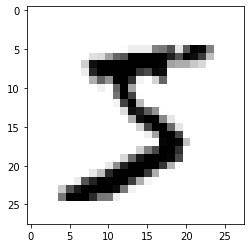

In [10]:
import matplotlib.pyplot as plt

print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
#temos de normalizar os dados neste caso temos imagens logo estão de 0 a 255
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [0]:
#criar o modelo
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [15]:
#compilar o modelo com os parametros desejados
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2633 - acc: 0.9225
Epoch 2/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1064 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0739 - acc: 0.9767


In [16]:
#será que over-fit? 
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0896 - acc: 0.9700
0.08959653476811945 0.97


In [0]:
#save the model
model.save('epic_num_reader.model')

In [24]:
#load model
new_model=tf.keras.models.load_model('epic_num_reader.model')
predictions=new_model.predict(x_test)
print(predictions) #funçao de distribuiçao de probabilidades

import numpy as np
print(np.argmax(predictions[0]))

[[3.1785465e-08 7.3198275e-10 1.5479924e-06 ... 9.9999118e-01
  5.8108235e-08 2.6463334e-07]
 [1.9771594e-08 3.6925722e-02 9.6280080e-01 ... 1.4470754e-08
  4.6838186e-06 1.1380051e-10]
 [2.1445830e-08 9.9990106e-01 2.7329449e-06 ... 6.9449947e-05
  1.1703395e-05 7.4778676e-08]
 ...
 [2.0616461e-08 1.4732635e-07 2.0388596e-08 ... 9.9125122e-05
  2.4104085e-05 2.7009514e-03]
 [5.4871896e-07 7.3700063e-10 5.3512961e-10 ... 4.7720562e-07
  9.0507948e-04 7.4260820e-10]
 [9.6759106e-07 2.5273890e-08 6.3772490e-07 ... 9.8313724e-10
  4.1154237e-07 7.1416619e-09]]
7
